### Ex 1.4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import typing

In [2]:
class Logistic:
    r = 0.5
    x_0 = 0.5
    error = 1e-6

    def __init__(self, r, x_0, error=1e-6):
        
        Logistic.r = r
        Logistic.x_0 = x_0
        Logistic.error = error

        self.x_list = [x_0]
        self.n = 0

    def next(self,n = 1):
        for i in range(n):
            self.x_list.append(Logistic.r * self.x_list[-1] * (1 - self.x_list[-1]))
            self.n += 1
        return self.x_list[-1], self.n
    
    def get_x_list(self):
        return self.x_list

    def computeTillThreshold(self,nmax = 1000,error = 1e-6):
        for _ in range(nmax):
            self.next()
            if(abs(self.x_list[-1] - self.x_list[-2]) < error):
                return True, self.n
        return False
        
    @staticmethod
    def logisticEq(x, r):
        return r * x * (1 - x)

    @staticmethod
    def fixedPoint(x_0, r, n=1000, error=1e-6):
        n = int(n)
        for i in range(n):
            x_next = r * x_0 * (1 - x_0)
            if abs(x_next - x_0) < error:
                return x_next, True
            x_0 = x_next
        return x_next, False

# (a)

Reached Error Threshold in Iterations:  (True, 56)
2. Reached Error Threshold in Iterations:  (True, 36)
Fixed Point Theoretical: 1 - 1/r =  0.6428571428571428


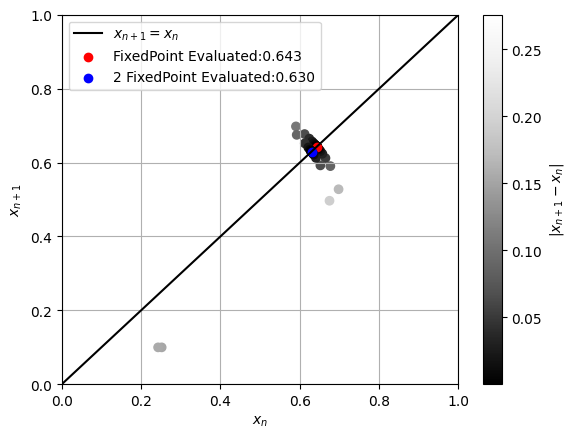

In [3]:
map_a = Logistic(x_0 = 0.1, r = 2.8)
print("Reached Error Threshold in Iterations: ",map_a.computeTillThreshold(error=1e-6))

map_b = Logistic(x_0 = 0.1,r=2.7)
print("2. Reached Error Threshold in Iterations: ",map_b.computeTillThreshold(error=1e-6))

X = np.array(map_a.get_x_list()[:])
errors = abs(X[1:]-X[:-1])

X2 = np.array(map_b.get_x_list()[:])
errors2 = abs(X2[1:]-X2[:-1])


fig = plt.figure()

plt.plot(np.linspace(0,1,50),np.linspace(0,1,50),color = 'black', label = "$x_{n+1} = x_n$")

logistic_plot = plt.scatter(X[1:],X[:-1],c = errors, cmap = 'Greys_r')
plt.scatter(X[-2],X[-1],color = 'r', label = f'FixedPoint Evaluated:{X[-1]:.3f}')

logistic_plot2 = plt.scatter(X2[1:],X2[:-1],c = errors2, cmap = 'Greys_r')
plt.scatter(X2[-2],X2[-1],color = 'b', label = f'2 FixedPoint Evaluated:{X2[-1]:.3f}')

cbar = plt.colorbar(logistic_plot)
cbar.set_label('$|x_{n+1} - x_n|$')

plt.grid()
plt.legend()
plt.xlabel("$x_n$")
plt.ylabel("$x_{n+1}$")
plt.xlim(0,1)
plt.ylim(0,1)

print("Fixed Point Theoretical: 1 - 1/r = ",1 - 1/2.8)


plt.show()

# (b)

In [4]:
R_1 = np.linspace(0,5,int(1e4))

X_l1 = np.array([Logistic.fixedPoint(0.4,r,n = 1e3,error = 1e-3)[0] for r in R_1])
X_u1 = np.array([Logistic.fixedPoint(0.7,r,n = 1e3,error = 1e-3)[0] for r in R_1])

R_2_range = [2.8,3.58]
R_2 = np.linspace(R_2_range[0],R_2_range[1],int(1e3))
X_l2 = np.array([Logistic.fixedPoint(0.4,r,n = 1e3,error = 1e-3)[0] for r in R_2])
X_u2 = np.array([Logistic.fixedPoint(0.7,r,n = 1e3,error = 1e-3)[0] for r in R_2])

C:\Users\Pradyumna\AppData\Local\Temp\ipykernel_2212\4103469588.py:39: RuntimeWarning: overflow encountered in scalar multiply
  x_next = r * x_0 * (1 - x_0)
C:\Users\Pradyumna\AppData\Local\Temp\ipykernel_2212\4103469588.py:40: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(x_next - x_0) < error:


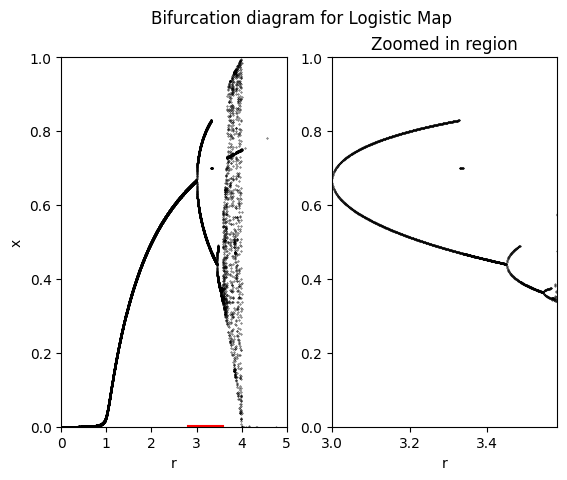

In [5]:

fig, axes = plt.subplots(1, 2) #sharey=True

# R -> 0 to 1
axes[0].scatter(R_1, X_l1, s=0.1, color='black')
axes[0].scatter(R_1, X_u1, s=0.1, color='black')

axes[0].plot(R_2_range,[0.001,0.001],color = 'r')
axes[0].set_xlim(0, 5)
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('r')
axes[0].set_ylabel('x')

# R -> 2.9 to 3.58
axes[1].scatter(R_2, X_l2, s=0.1, color='black')
axes[1].scatter(R_2, X_u2, s=0.1, color='black')

axes[1].set_xlim(3, 3.58)
axes[1].set_ylim(0, 1)
axes[1].set_xlabel('r')
axes[1].set_title('Zoomed in region')

fig.suptitle('Bifurcation diagram for Logistic Map')
plt.show()

# Calculating for all Unique Fixed Points

In [7]:
res = 10
R_1 = np.linspace(0,4,int(1e4))
X0 = np.linspace(0,1,int(res))

X_1 = np.array([np.array([Logistic.fixedPoint(x0,r,n = 1e3,error = 1e-3)[0] for x0 in X0]) for r in R_1])

R_2_range = [2.99,3.6]
R_2 = np.linspace(R_2_range[0],R_2_range[1],int(1e4))
X_2 = np.array([np.array([Logistic.fixedPoint(x0,r,n = 1e3,error = 1e-3)[0] for x0 in X0]) for r in R_2])

print("DONE",np.shape(X_1),np.shape(X_2))

DONE (10000, 10) (10000, 10)


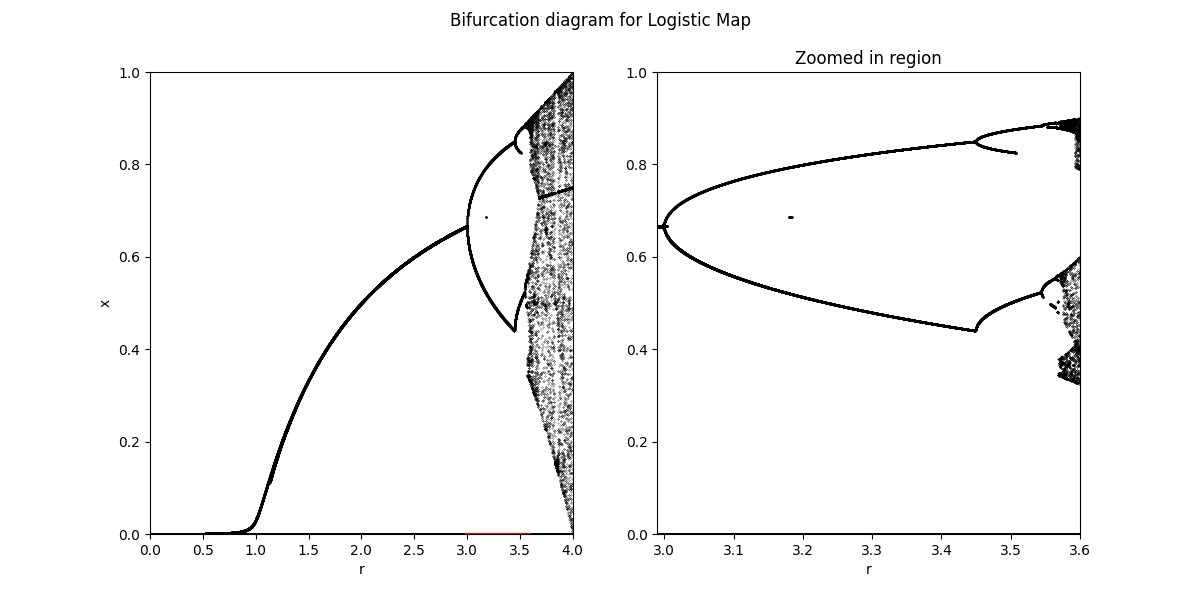

In [8]:
%matplotlib widget
fig, axes = plt.subplots(1, 2,figsize=(12,6)) #sharey=True
# R -> 0 to 1


r = np.multiply(np.ones(np.shape(X_1)).T,R_1).T
x = np.ndarray.flatten(X_1)

axes[0].scatter(r,x,s=0.05, color='black')

axes[0].plot(R_2_range,[0.001,0.001],color = 'r')
axes[0].set_xlim(0, 4)
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('r')
axes[0].set_ylabel('x')

r = np.multiply(np.ones(np.shape(X_2)).T,R_2).T
x = np.ndarray.flatten(X_2)

axes[1].scatter(r,x,s=0.05, color='black')

axes[1].set_xlim(*R_2_range)
axes[1].set_ylim(0, 1)
axes[1].set_xlabel('r')
axes[1].set_title('Zoomed in region')

fig.suptitle('Bifurcation diagram for Logistic Map')
plt.show()

### r = 3.84

In [9]:
r_ = 3.84
delta,steps = 0.02, 2e3

#res = 5
#X0 = np.linspace(0,1,int(res))
X0 = np.array([0.2,0.4,0.43,0.46,0.5,0.53,0.56,0.6,0.8])

R = np.linspace(r_-delta,r_+delta,int(steps))
X = np.array([np.array([Logistic.fixedPoint(x0,r,n = 1e3,error = 1e-3)[0] for x0 in X0]) for r in R])

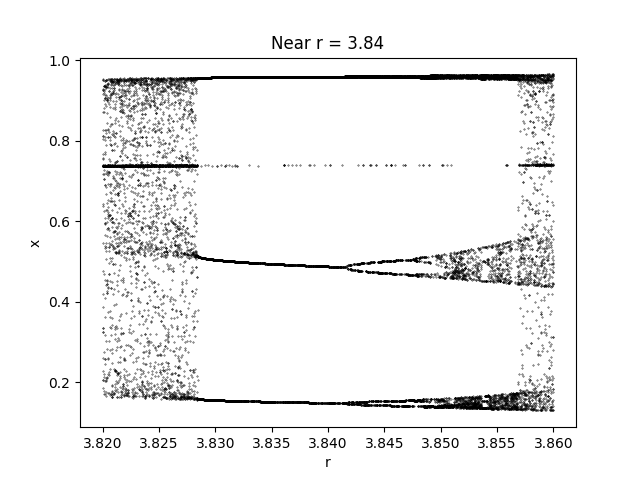

In [10]:
%matplotlib widget

r = np.multiply(np.ones(np.shape(X)).T,R).T
x = np.ndarray.flatten(X)

fig = plt.figure()

plt.scatter(r,x,s = 0.1,color='black')

#plt.xlim(r_-delta,r_+delta)
#plt.ylim(0, 1)
plt.xlabel('r')
plt.ylabel('x')
plt.title("Near r = 3.84")
plt.show()